# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-01-06 19:00:47,711 | INFO : Running online!
2023-01-06 19:00:47,759 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-01-06 19:00:48,819 | INFO : 2023-01-06_19-00-48-819572
2023-01-06 19:00:48,956 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-01-06 19:00:49,435 | INFO : 2023-01-06_19-00-49-435847
2023-01-06 19:00:49,587 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-01-06 19:00:50,037 | INFO : 2023-01-06_19-00-50-037245
2023-01-06 19:00:50,173 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-01-06 19:00:50,625 | INFO : 2023-01-06_19-00-50-625550
2023-01-06 19:00:50,786 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7565827289738385
2023-01-06 19:00:51,239 | INFO : 2023-01-06_19-00-51-239584
2023-01-06 19:00:51,461 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.21381894081153208
2023-01-06 19:00:51,905 | INFO : 2023-01-06_19-00-51-905037
2023-01-06 19:00:52,044 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.32894484735077434
2023-01-06 19:00:52,521 | INFO : 2023-01-06_19-00-52-521541
2023-01-06 

/usr/share/miniconda/envs/pyemittance-dev/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


2023-01-06 19:00:57,537 | INFO : EPICS put QUAD:HTR:120:BCTRL = 1.787280435930492
2023-01-06 19:00:57,981 | INFO : 2023-01-06_19-00-57-981148
2023-01-06 19:00:57,983 | INFO : Beam params out of bounds in image 0 out of 1 samples
2023-01-06 19:00:58,129 | INFO : EPICS put QUAD:HTR:120:BCTRL = 2.96522610413912
2023-01-06 19:00:58,559 | INFO : 2023-01-06_19-00-58-559330
2023-01-06 19:00:58,717 | INFO : EPICS put QUAD:HTR:120:BCTRL = 3.5855275763246133
2023-01-06 19:00:59,152 | INFO : 2023-01-06_19-00-59-152560
2023-01-06 19:00:59,286 | INFO : EPICS put QUAD:HTR:120:BCTRL = 4.205829048510107
2023-01-06 19:00:59,766 | INFO : 2023-01-06_19-00-59-766926
2023-01-06 19:00:59,901 | INFO : EPICS put QUAD:HTR:120:BCTRL = 4.8261305206956
2023-01-06 19:01:00,346 | INFO : 2023-01-06_19-01-00-346003
2023-01-06 19:01:00,488 | INFO : EPICS put QUAD:HTR:120:BCTRL = 3.1109024834881494
2023-01-06 19:01:00,947 | INFO : 2023-01-06_19-01-00-947156
2023-01-06 19:01:01,234 | INFO : EPICS put QUAD:HTR:120:BCTRL 

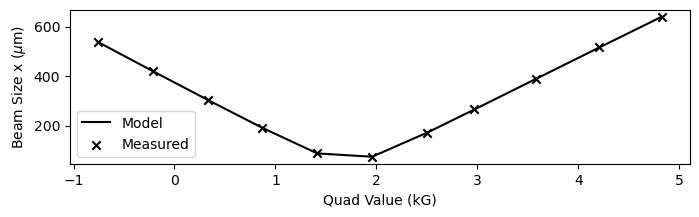

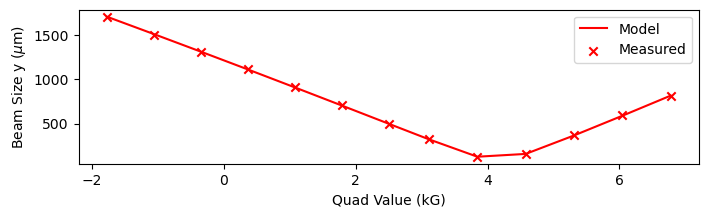

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.75658273, -0.21381894,  0.32894485,  0.87170864,  1.41447242,
         1.95723621,  2.5       ,  2.9652261 ,  3.58552758,  4.20582905,
         4.82613052]),
 'beamsizesx': array([5.39299104e-04, 4.21751168e-04, 3.03096877e-04, 1.91428281e-04,
        8.77376131e-05, 7.45571153e-05, 1.70422886e-04, 2.65678516e-04,
        3.90019621e-04, 5.17775697e-04, 6.38332450e-04]),
 'beamsizeserrx': array([0.03192321, 0.02115496, 0.01426073, 0.00660652, 0.00181104,
        0.00162508, 0.00460535, 0.0092621 , 0.02047391, 0.03339797,
        0.03938205]),
 'error_x': False,
 'emit_x': 6.447406846873597e-09,
 'norm_emit_x': 1.0093602452168073e-06,
 'beta_x': 9.885531758052927,
 'alpha_x': -1.9721935511218769,
 'emit_x_err': 1.900458059086308e-07,
 'norm_emit_x_err': 2.9752222220531783e-05,
 'beta_x_rel_err': 29.476316668427053,
 'alpha_x_rel_err': -1.7967487370188596e-15,
 'sigma_11': 6.373604514185683e-08,
 'sigma_12': 1.2715534204863142e-08,
 'sigma_22': 3.1889939940857093e

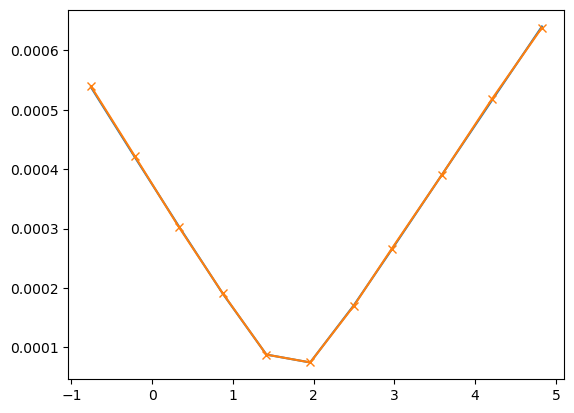

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

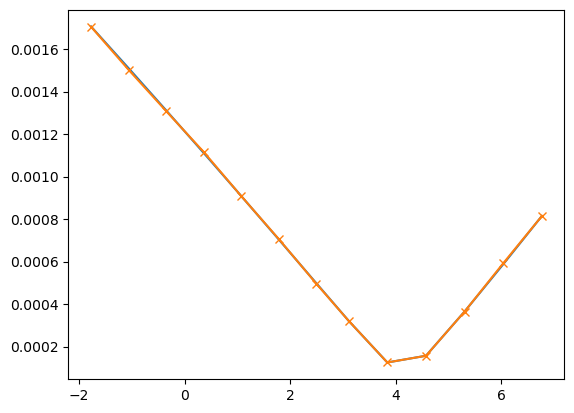

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


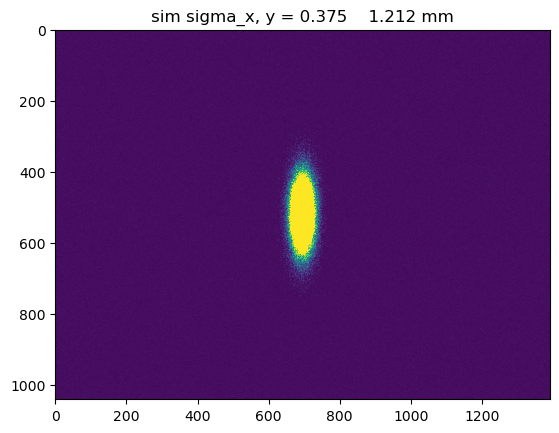

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)